<a href="https://colab.research.google.com/github/Sneha1928/Deep-Learning/blob/main/Neural_Network_in_simple_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#importing dataset
data = pd.read_csv("/content/drive/MyDrive/MY ML PROJECTS/diabetes.csv")

[Dataset link](https://drive.google.com/file/d/1oaUPsdIPJqNkBcdnhDyhKBTaReeJw4wg/view?usp=sharing)

In [ ]:
# viewing the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here, we have to predict if the patient will have diabetes or not from the diagnostics measurements. Its a type of classification problem. 0 means non-diabetic and 1 means diabetic.

**Checking the target variable distribution.**

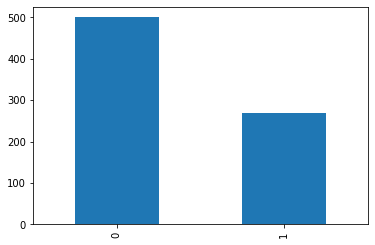

In [ ]:
import seaborn as sns
data["Outcome"].value_counts().plot(kind = 'bar')

In [ ]:
predictors = data.iloc[:,0:8]
response = data.iloc[:,8]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(predictors,response,test_size=0.2)

# Neural network training

There are two ways to build Keras model:


1.   Sequential
2.   Functional

The sequential API will allow us to model layer by layer.
If we need to build arbitrary graphs of layers, Keras functional API can do that for us.


In [ ]:
# defining the keras model layer by layer

kerasmodel = Sequential() # inintializing model - Dense for fully connected layer
kerasmodel.add(Dense(12,input_dim=8,activation="relu")) # First hidden layer
kerasmodel.add(Dense(8,activation="relu")) # relu to avoid vanishing exploding problem
kerasmodel.add(Dense(1,activation="sigmoid")) # sigmoid since it is binary classification type problem
# bias and weight are default metod using glorot_uniform technique

In [ ]:
# compiling the model
kerasmodel.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
# fitting the model
kerasmodel.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 2ms/step - loss: 2.7560 - accuracy: 0.5102
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 1.1698 - accuracy: 0.6253
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.6552
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8100 - accuracy: 0.6395
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7217 - accuracy: 0.6595
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.6383
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6395
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6786
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6651
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6599
Epoch 11/

# Evaluating the model

In [ ]:
_, accuracy = kerasmodel.evaluate(X_train,y_train)
print("Accuracy of our model is ",accuracy)

20/20 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7655
Accuracy of our model is  0.7654722929000854


In [ ]:
# Test accuracy
from sklearn.metrics import accuracy_score

y_pred = kerasmodel.predict_classes(X_test)
accu = accuracy_score(y_test,y_pred)
print("accuracy of test set is ",accu)

accuracy of test set is  0.7532467532467533


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
